In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import quad
import numpy as np

In [2]:
np.default_float_dtype = np.float64 

In [3]:
right_rectangle_method = lambda f, a, b: f(b)
left_rectangle_method = lambda f, a, b: f(a)
mean_method = lambda f,a,b: f((a+b)/2)
simpson_method = lambda f, a, b: (f(a) + 4 * f((a+b)/2) + f(b)) / 6
trapezoidal_method = lambda f, a, b: (f(a) + f(b)) / 2


def integration_function(f, a, b, strategy, N=3):
    a = np.float64(a)
    b = np.float64(b)
    
    step = (b - a) / np.float64(N)
    left = a
    right = a + step
    _sum = np.float64(0)
    
    for i in range(N):
        _sum += strategy(f, left, right)
        left += step
        right += step
    return _sum * step

In [34]:
def J(m, strategy, a, b, n = 100, N=1000):
    a = np.float64(a)
    b = np.float64(b)
    function = lambda x: (1/np.pi) * integration_function(lambda t: np.cos(np.float64(m) * np.float64(t) - x * np.sin(t)), 0, np.pi, strategy, N)
    domain = np.linspace(a, b, n, dtype =  np.float64)
    for i in range(domain.shape[0]):
        domain[i] = function(domain[i])
    return domain

In [145]:
a_1 = np.float64(4)/np.float64(5)
a_2 = np.float64(1)/np.float64(5)
a_3 = np.float64(4)/np.float64(105)
a_4 = np.float64(1)/np.float64(280)
def derivative(f_values,a,b,n):
    f_size = f_values.size
    step = (b - a)/n
    result = np.zeros(f_size - 10)
    for k,i in enumerate(range(5, f_size-5)):
        result[k] = (a_4*np.float64(f_values[i - 4]) - a_3*np.float64(f_values[i-3]) +\
        a_2*np.float64(f_values[i - 2]) - a_1*np.float64(f_values[i - 1]) + np.float64(a_1*f_values[i + 1])-\
        a_2*np.float64(f_values[i+2]) + a_3*np.float64(f_values[i+3]) - a_4*np.float64(f_values[i + 4]))/np.float64(step)

        '''result[k] = (a_4*f_values[i - 4] - a_3*f_values[i-3] +\
        a_2*f_values[i - 2] - a_1*f_values[i - 1] + a_1*f_values[i + 1]-\
        a_2*f_values[i+2] + a_3*f_values[i+3] - a_4*f_values[i + 4])/step'''
        
    return result

In [146]:
def derivative6(f,a,b, n):
    f_size = f.size
    step = (a - b)/N
    result = np.zeros(f_size - 10)
   
    for k,i in enumerate(range(5, f_size-5)):
        result[k] = (-2*f[i-5]/(2520*step)+25*f[i-4]/(2520*step)-150*f[i-3]/(2520*step)+600*f[i-2]/(2520*step)-2100*f[i-1]/(2520*step)+\
        0*f[i+0]/(2520*step)+2100*f[i+1]/(2520*step)-600*f[i+2]/(2520*step)+150*f[i+3]/(2520*step)-25*f[i+4]/(2520*step)+2*f[i+5]/(2520*step))

        '''result[k] = (a_4*f_values[i - 4] - a_3*f_values[i-3] +\
        a_2*f_values[i - 2] - a_1*f_values[i - 1] + a_1*f_values[i + 1]-\
        a_2*f_values[i+2] + a_3*f_values[i+3] - a_4*f_values[i + 4])/step'''
        
    return result

In [147]:
def derivative2(f_values,step):
    f_size = f_values.size
    result = np.zeros(f_size - 4)
    a_1 = 2/3
    a_2 = 1/12
    for k,i in enumerate(range(2, f_size-2)):

        result[k] = (a_2*f_values[i - 2] - a_1*f_values[i-1] +\
        a_1*f_values[i + 1] - a_2*f_values[i +2] )/step
        
    return result

In [148]:
'''def derivative2(f_values,step):
    count = f_values.size - 4
    result = np.zeros(count)
    a_1 = 2/3
    a_2 = 1/12
    for i in range(2,count):
        result[i] = (a_2*f_values[i-2] - a_1*f_values[i - 1]+\
                    a_1*f_values[i+1] - a_2*f_values[i+2])/step
        
    return result'''

'def derivative2(f_values,step):\n    count = f_values.size - 4\n    result = np.zeros(count)\n    a_1 = 2/3\n    a_2 = 1/12\n    for i in range(2,count):\n        result[i] = (a_2*f_values[i-2] - a_1*f_values[i - 1]+                    a_1*f_values[i+1] - a_2*f_values[i+2])/step\n        \n    return result'

In [284]:
n = 1001
N = 11
a = 0
b = 2*np.pi

In [285]:
f_values_1 = J(1, simpson_method, a,b, n, N)
f_values_1.size

1001

In [286]:
f_values_0 = J(0, simpson_method, a, b, n, N)

In [287]:
f_values_1 = f_values_1[5:-5]
domain = np.linspace(a, b, n, dtype = np.float64)
domain = domain[5:-5]
print(f_values_1.size, domain.size)

991 991


In [288]:
d_J = derivative(f_values_0,a,b,n)
d_J.size

991

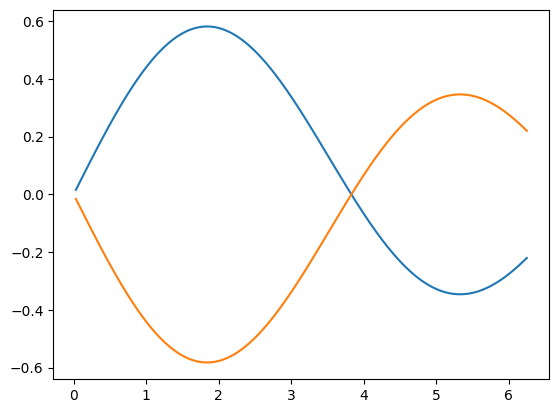

In [289]:
plt.plot(domain, f_values_1)
plt.plot(domain, d_J)

In [290]:
simpson_errors = f_values_1 + d_J
#assert np.all(simpson_errors < 1e-10)
#assert np.all(trapezoidal_errors < precision)
errors.append(simpson_errors.max())
N_a.append(N)
#S_a.append(step)

In [291]:
simpson_errors.max()

np.float64(0.00034612471775785636)

In [249]:
for i in range(len(errors)):
    print(f"error : {errors[i]} --------N: {N_a[i]}      ----------step: {S_a[i]}")


error : -0.000582447124899077 --------N: 10      ----------step: 1e-08
error : -5.819234139226026e-05 --------N: 10      ----------step: 1e-08
error : -5.8192381521715575e-05 --------N: 5      ----------step: 1e-08
error : -6.176408301583614e-05 --------N: 2      ----------step: 1e-08
error : -3.088049718080743e-05 --------N: 2      ----------step: 1e-08
error : -1.0293156928131708e-05 --------N: 2      ----------step: 1e-08
error : -6.175854176615481e-06 --------N: 2      ----------step: 1e-08
error : 4.67079706539808e-06 --------N: 2      ----------step: 1e-08
error : 5.190606726102054e-07 --------N: 2      ----------step: 1e-08
error : 4.737969572232714e-08 --------N: 2      ----------step: 1e-08


In [239]:
e_np = np.array(simpson_errors)
np.argmax(e_np)

np.int64(854372)

In [240]:
errors

[np.float64(-0.000582447124899077),
 np.float64(-5.819234139226026e-05),
 np.float64(-5.8192381521715575e-05),
 np.float64(-6.176408301583614e-05),
 np.float64(-3.088049718080743e-05),
 np.float64(-1.0293156928131708e-05),
 np.float64(-6.175854176615481e-06),
 np.float64(4.67079706539808e-06),
 np.float64(5.190606726102054e-07)]

In [161]:
N_a

[100, 100, 100, 100, 100]

In [162]:
N_a = []

In [163]:
S_a = []

In [164]:
error = []

In [165]:
errors = []

In [166]:
errors

[]

In [308]:

function = lambda x: (1/np.pi) * integration_function(lambda t: np.cos(m * t - x * np.sin(t)), 0, np.pi,simpson_method)
y = function(x_max)

NameError: name 'x_max' is not defined

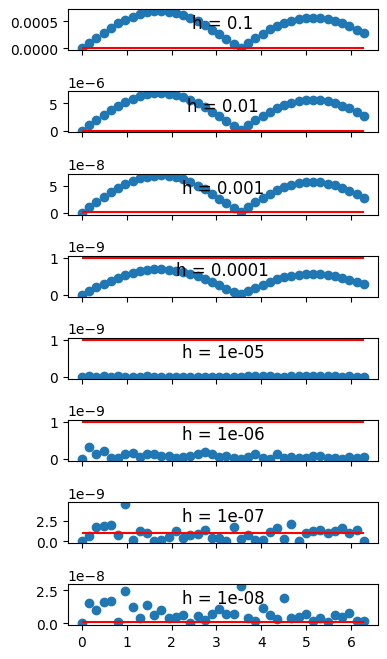

In [6]:
step_sizes = [1e-1, 1e-2, 1e-3 ,1e-4, 1e-5, 1e-6,1e-7, 1e-8]

a = 0
b = 2 * np.pi
N = 40
span = np.linspace(a, b, N)

fg, ax = plt.subplots(len(step_sizes), 1, sharex=True, figsize = (4, len(step_sizes)))
fg.subplots_adjust(hspace=1)
for i in range(len(step_sizes)):    
    errors = np.vectorize(lambda x: dJ(x, 0, simpson_method, delta=step_sizes[i]) + J(x, 1,simpson_method))(span)
    ax[i].scatter(span, abs(errors))
    ax[i].set_title("h = {}".format(step_sizes[i]), y=1.0, pad=-14)
    ax[i].hlines(precision, xmin=span[0], xmax=span[-1], color='red')

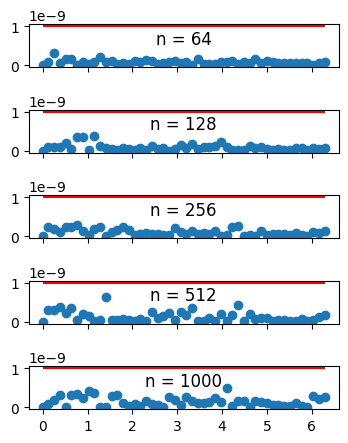

In [46]:
step_sizes = [1e-1, 1e-2, 1e-3 ,1e-4, 1e-5, 1e-6,1e-7, 1e-8]
N = [64, 128, 256, 512, 1000]
a = 0
b = 2 * np.pi



fg, ax = plt.subplots(len(N), 1, sharex=True, figsize = (4, len(N)))
fg.subplots_adjust(hspace=1)
i = 0
for n in N:    
    span = np.linspace(a, b, 50)
    errors = np.vectorize(lambda x: dJ(x, 0, simpson_method, 1e-6,  n) + J(x, 1,simpson_method, n))(span)
    ax[i].scatter(span, abs(errors))
    ax[i].set_title("n = {}".format(n), y=1.0, pad=-14)
    ax[i].hlines(precision, xmin=span[0], xmax=span[-1], color='red')
    i+=1

In [19]:
from scipy.special import jn

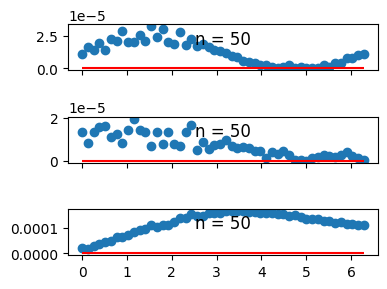

In [15]:
step_sizes = [1e-1, 1e-2, 1e-3 ,1e-4, 1e-5, 1e-6,1e-7, 1e-8]
N = [64, 128, 256, 512]
a = 0
b = 2 * np.pi



fg, ax = plt.subplots(len(N) - 1, 1, sharex=True, figsize = (4, len(N) - 1))
fg.subplots_adjust(hspace=1)
i = 0
for i in range(len(N) - 1):    
    span = np.linspace(a, b, 50)
    errors = np.vectorize(lambda x: (J(x, 1,simpson_method, N[i]) - J(x, 1,simpson_method, N[i+1]))/1e-10)(span)
    ax[i].scatter(span, abs(errors))
    ax[i].set_title("n = {}".format(50), y=1.0, pad=-14)
    ax[i].hlines(precision, xmin=span[0], xmax=span[-1], color='red')
    i+=1

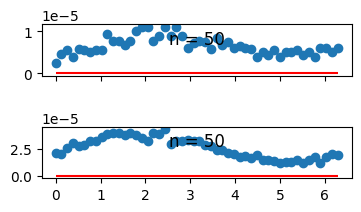

In [33]:
step_sizes = [1e-1, 1e-2, 1e-3 ,1e-4, 1e-5, 1e-6,1e-7, 1e-8]
N = [2**5, 2**8]
a = 0
b = 2 * np.pi



fg, ax = plt.subplots(len(N), 1, sharex=True, figsize = (4, len(N)))
fg.subplots_adjust(hspace=1)
i = 0
for i in range(len(N) ):    
    span = np.linspace(a, b, 50)
    errors = np.vectorize(lambda x: (J(x, 1,simpson_method, N[i]) - jn(1, x))/1e-10)(span)
    ax[i].scatter(span, abs(errors))
    ax[i].set_title("n = {}".format(50), y=1.0, pad=-14)
    ax[i].hlines(precision, xmin=span[0], xmax=span[-1], color='red')
    i+=1

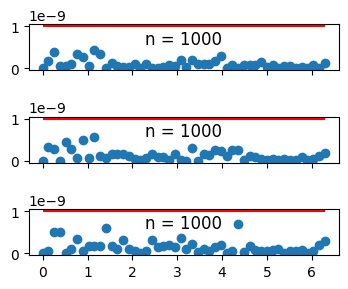

In [49]:
step_sizes = [1e-1, 1e-2, 1e-3 ,1e-4, 1e-5, 1e-6,1e-7, 1e-8]
N = [64, 128, 256, 512]
a = 0
b = 2 * np.pi



fg, ax = plt.subplots(len(N) - 1, 1, sharex=True, figsize = (4, len(N) - 1))
fg.subplots_adjust(hspace=1)
i = 0
for i in range(len(N) - 1):    
    span = np.linspace(a, b, 50)
    errors = np.vectorize(lambda x: dJ(x, 0,simpson_method, 1e-6, N[i]) -dJ(x, 0,simpson_method, 1e-6, N[i + 1]))(span)
    ax[i].scatter(span, abs(errors))
    ax[i].set_title("n = {}".format(n), y=1.0, pad=-14)
    ax[i].hlines(precision, xmin=span[0], xmax=span[-1], color='red')
    i+=1

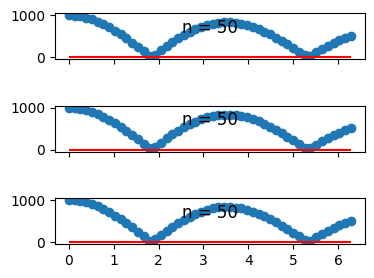

In [13]:
step_sizes = [1e-1, 1e-2, 1e-3 ,1e-4, 1e-5, 1e-6,1e-7, 1e-8]
N = [64, 128, 256, 512]
a = 0
b = 2 * np.pi



fg, ax = plt.subplots(len(N) - 1, 1, sharex=True, figsize = (4, len(N) - 1))
fg.subplots_adjust(hspace=1)
i = 0
for i in range(len(N) - 1):    
    span = np.linspace(a, b, 50)
    errors = np.vectorize(lambda x: ((J(x + 1e-7 , 1,simpson_method, N[i]) - J(x - 1e-7, 1,simpson_method, N[i])) - (J(x + 1e-7 , 1,simpson_method, N[i+1]) - J(x - 1e-7, 1,simpson_method, N[i+1]))/1e-10))(span)
    ax[i].scatter(span, abs(errors))
    ax[i].set_title("n = {}".format(50), y=1.0, pad=-14)
    ax[i].hlines(precision, xmin=span[0], xmax=span[-1], color='red')
    i+=1